## IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import ADASYN, RandomOverSampler, SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, f1_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## IMPORTING DATASET

In [ ]:
td=pd.read_csv("/content/drive/MyDrive/thyroid data.csv")
td.head(10)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
5,18,F,t,f,f,f,f,f,f,f,...,t,183,t,1.3,t,141,f,?,other,P
6,59,F,f,f,f,f,f,f,f,f,...,t,72,t,0.92,t,78,f,?,other,P
7,80,F,f,f,f,f,f,f,f,f,...,t,80,t,0.7,t,115,f,?,SVI,P
8,66,F,f,f,f,f,f,f,f,f,...,t,123,t,0.93,t,132,f,?,SVI,P
9,68,M,f,f,f,f,f,f,f,f,...,t,83,t,0.89,t,93,f,?,SVI,P


In [ ]:
td.shape

(3772, 30)

In [ ]:
td.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,2
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,P
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [ ]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu



## DATA PREPROCESSING

---





In [ ]:
#dropping the irrelevant features
td.drop(['TBG measured','TBG','T3 measured','TSH measured','TT4 measured','T4U measured','FTI measured','referral source'],axis=1,inplace=True)
td

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.3,2.5,125,1.14,109,P
1,23,F,f,f,f,f,f,f,f,f,...,f,f,f,f,4.1,2,102,?,?,P
2,46,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.98,?,109,0.91,120,P
3,70,F,t,f,f,f,f,f,f,f,...,f,f,f,f,0.16,1.9,175,?,?,P
4,70,F,f,f,f,f,f,f,f,f,...,f,f,f,f,0.72,1.2,61,0.87,70,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,t,f,f,?,?,?,?,?,P
3768,68,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1,2.1,124,1.08,114,P
3769,74,F,f,f,f,f,f,f,f,f,...,f,f,f,f,5.1,1.8,112,1.07,105,P
3770,72,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.7,2,82,0.94,87,P


In [ ]:
#replace the "?" into null value
td = td.replace(['?'],np.nan)

In [ ]:
td.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
binaryClass                    0
dtype: int64

In [ ]:
column="age"
td[column]=pd.to_numeric(td[column],errors="coerce").fillna(-1).astype(int)

In [ ]:
td.sex.replace({'F':2,'M':1},inplace=True)
round_Values = round(td.sex.mean())
td.sex.fillna(round_Values,inplace=True)

In [ ]:
#KNNImputer- used to fill the missing values for certain features

knnimp=KNNImputer(n_neighbors=3)

cols= ['TSH','T3','TT4','T4U','FTI']
for i in cols:
    td[i]=knnimp.fit_transform(td[[i]])

In [ ]:
td.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
binaryClass                  0
dtype: int64

In [ ]:
td.dtypes

age                            int64
sex                          float64
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
binaryClass                   object
dtype: object

**bold text**
## EDA



In [ ]:
td.corr()

<ipython-input-95-4cf9386717a6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  td.corr()


,age,sex,TSH,T3,TT4,T4U,FTI
age,1.000000,-0.000304,-0.055981,-0.214245,-0.037811,-0.156722,0.049183
sex,-0.000304,1.000000,0.033615,0.064213,0.167546,0.221883,0.041900
TSH,-0.055981,0.033615,1.000000,-0.147331,-0.261300,0.071028,-0.293023
T3,-0.214245,0.064213,-0.147331,1.000000,0.509065,0.407242,0.308837
TT4,-0.037811,0.167546,-0.261300,0.509065,1.000000,0.426484,0.779101
T4U,-0.156722,0.221883,0.071028,0.407242,0.426484,1.000000,-0.174005
FTI,0.049183,0.041900,-0.293023,0.308837,0.779101,-0.174005,1.000000


In [ ]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   int64  
 1   sex                        3772 non-null   float64
 2   on thyroxine               3772 non-null   object 
 3   query on thyroxine         3772 non-null   object 
 4   on antithyroid medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid surgery            3772 non-null   object 
 8   I131 treatment             3772 non-null   object 
 9   query hypothyroid          3772 non-null   object 
 10  query hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

EDA

In [ ]:
#To check the multicollinearity in the dataset variance inflation factor is used
x=td.iloc[:,[16,17,18,19,20]]

vif_data=pd.DataFrame()
vif_data["feature"]=x.columns


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data["VIF"]=[variance_inflation_factor(x.values,i)
                    for i in range(len(x.columns))]

print(vif_data)

  feature        VIF
0     TSH   1.186165
1      T3  12.262473
2     TT4  46.126858
3     T4U  18.629518
4     FTI  27.443861


In [ ]:
#The variable "TT4" has a high VIF of about 46.13, indicating significant multicollinearity.
#Droping highly correlated variables from the dataset
td.drop(["TT4"],axis=1,inplace=True)

<ipython-input-100-96e0aa9277d9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(td.corr(), cbar=True, fmt='.1f', annot=True, center=1)


<Axes: >

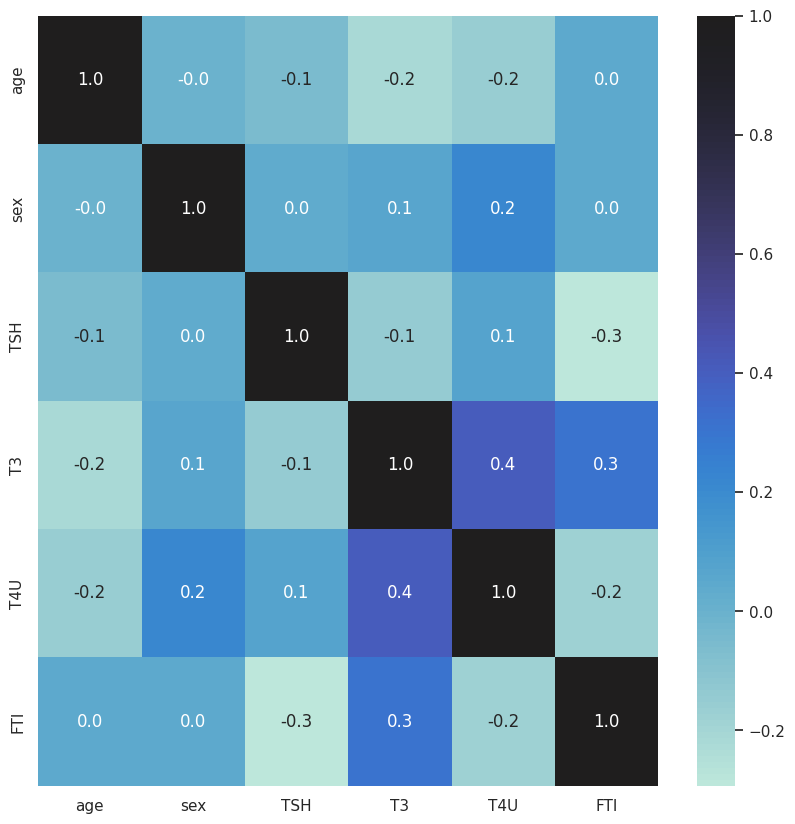

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(td.corr(), cbar=True, fmt='.1f', annot=True, center=1)

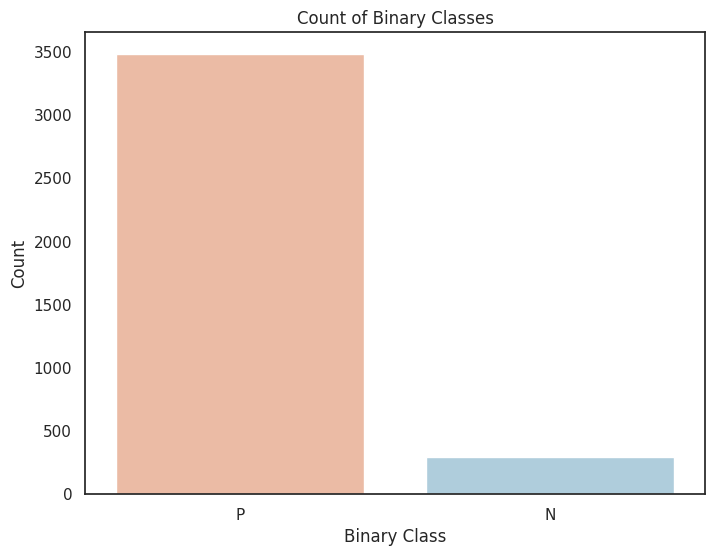

In [ ]:
#countplot to show the count of target patients
sns.set(style="white")

plt.figure(figsize=(8, 6))
sns.countplot(x='binaryClass', data=td,hue='binaryClass', palette='RdBu')
plt.title("Count of Binary Classes")

plt.xlabel('Binary Class')
plt.ylabel('Count')


plt.show()

<ipython-input-102-4ca70d39a367>:3: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = td,palette = shades)


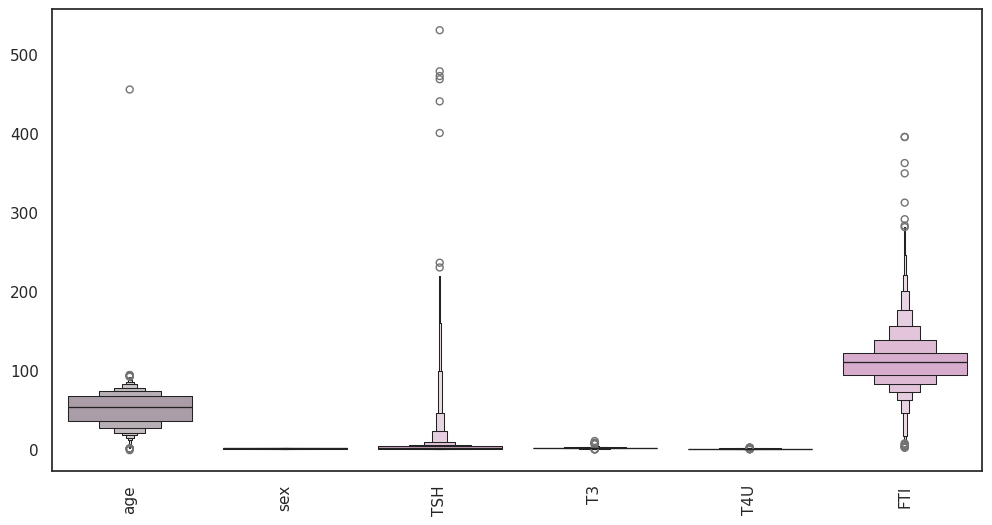

In [ ]:
#this shows the outliers in the dataset
shades =["#AC9BA8","#5C144A","#E0A4D1"]
plt.figure(figsize=(12,6))
sns.boxenplot(data = td,palette = shades)
plt.xticks(rotation=90)
plt.show()

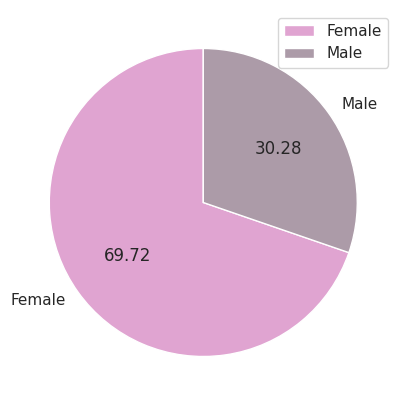

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(x=td.sex.value_counts(),
        labels=['Female','Male'],
        startangle = 90,
        colors=["#E0A4D1","#AC9BA8"],
        autopct='%.2f'
       )
plt.legend()

Female patients who has disease is greater than male patients.



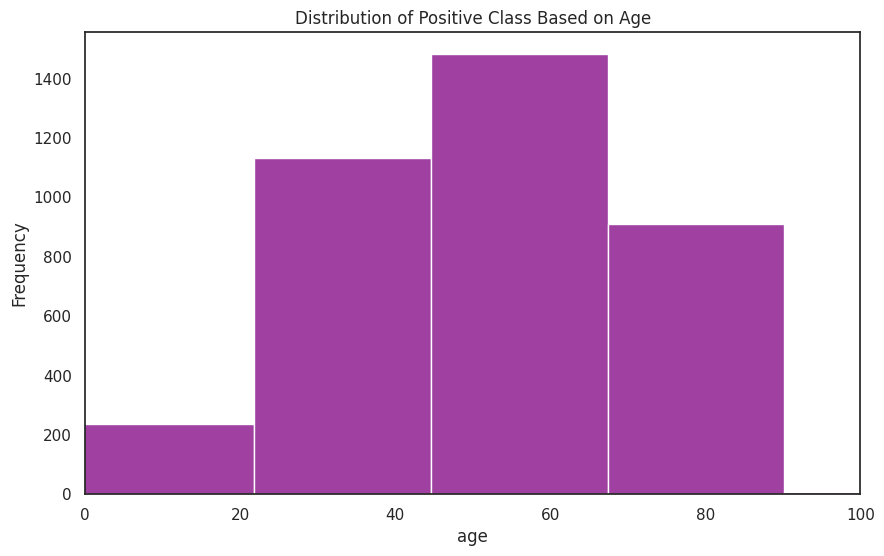

In [ ]:
positive_df = td[td.binaryClass=='P']

plt.figure(figsize=(10, 6))
# Set x-axis limits to show ages from 0 to 100
plt.xlim(0, 100)
sns.histplot(x='age', data=td, color='purple', bins=20)  # You can adjust the number of bins
plt.title("Distribution of Positive Class Based on Age")
plt.xlabel('age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()


The majority of individuals aged between 50 and 70 have a positive result for thyroid disease.



([<matplotlib.patches.Wedge at 0x79a1c5375f30>,
 [Text(-1.0718711497648585, -0.24716844115250725, 'Sick'),
  Text(1.2667568099398268, 0.2921081725509816, 'Well')],
 [Text(-0.5846569907808318, -0.1348191497195494, '96.1'),
  Text(0.7795426522706626, 0.17975887541598864, '3.9')])

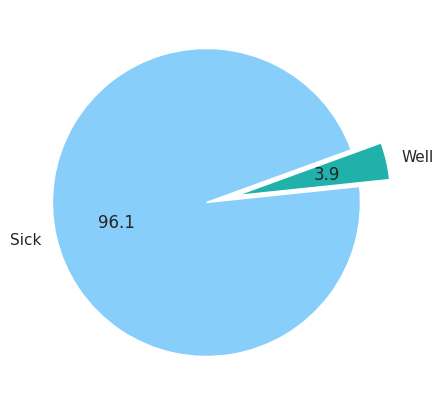

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(x=td.sick.value_counts(),
        labels=['Sick','Well'],
        startangle = 20,
        colors=['lightSkyBlue','lightSeaGreen'],
        autopct='%.1f',
        explode=[0,0.2]
       )

According to the dataset, a vast majority of individuals (96%) were diagnosed with thyroid disease.

## MODEL

In [ ]:
#OrdinalEncoder- used to transform the categorical features into numerical
categorical_columns = ['sick', 'on thyroxine','query on thyroxine','on antithyroid medication','pregnant','thyroid surgery','I131 treatment',
                       'query hypothyroid','lithium','query hyperthyroid','goitre','tumor','hypopituitary','psych','binaryClass']

ordinal_encoder = OrdinalEncoder()
td[categorical_columns] = ordinal_encoder.fit_transform(td[categorical_columns])

print(td.head())

   age  sex  on thyroxine  query on thyroxine  on antithyroid medication  \
0   41  2.0           0.0                 0.0                        0.0   
1   23  2.0           0.0                 0.0                        0.0   
2   46  1.0           0.0                 0.0                        0.0   
3   70  2.0           1.0                 0.0                        0.0   
4   70  2.0           0.0                 0.0                        0.0   

   sick  pregnant  thyroid surgery  I131 treatment  query hypothyroid  ...  \
0   0.0       0.0              0.0             0.0                0.0  ...   
1   0.0       0.0              0.0             0.0                0.0  ...   
2   0.0       0.0              0.0             0.0                0.0  ...   
3   0.0       0.0              0.0             0.0                0.0  ...   
4   0.0       0.0              0.0             0.0                0.0  ...   

   lithium  goitre  tumor  hypopituitary  psych   TSH      T3    T4U  \
0 

In [ ]:
#converting every features types as int

columns_to_convert = [col for col in td.columns]
td[columns_to_convert] = td[columns_to_convert].astype(int)

print(td.head())

   age  sex  on thyroxine  query on thyroxine  on antithyroid medication  \
0   41    2             0                   0                          0   
1   23    2             0                   0                          0   
2   46    1             0                   0                          0   
3   70    2             1                   0                          0   
4   70    2             0                   0                          0   

   sick  pregnant  thyroid surgery  I131 treatment  query hypothyroid  ...  \
0     0         0                0               0                  0  ...   
1     0         0                0               0                  0  ...   
2     0         0                0               0                  0  ...   
3     0         0                0               0                  0  ...   
4     0         0                0               0                  0  ...   

   lithium  goitre  tumor  hypopituitary  psych  TSH  T3  T4U  FTI  \
0   

In [ ]:
td['binaryClass'].value_counts() # It shows the imbalance in the target column

1    3481
0     291
Name: binaryClass, dtype: int64

In [ ]:
X=td.drop('binaryClass',axis='columns')
y=td.binaryClass

In [ ]:
#Spliting the dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size=0.20,
                                                  stratify=y,
                                                  random_state=13)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform both the training and test data using the scaler
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def compute_results(X_train, y_train, X_test, y_test, sampler, classifier):
    X_train_res, y_train_res = sampler.fit_resample(X_train, y_train)
    classifier.fit(X_train_res, y_train_res)
    y_pred = classifier.predict(X_test)

    metrics = dict()  #To store evaluation metrics for a single classifier-sampler combination.
    metrics['Accuracy'] = accuracy_score(y_test, y_pred)
    metrics['Precision'] = precision_score(y_test, y_pred)
    metrics['Recall'] = recall_score(y_test, y_pred)
    metrics['F-score'] = f1_score(y_test, y_pred)

#Error matrix is created using the confusion matrix generated by comparing the true labels with the predicted labels
    error_matrix = pd.DataFrame(
        confusion_matrix(y_test, y_pred, labels=[1, 0]),
        columns=['a(x) = 1', 'a(x) = 0'],
        index=['y = 1', 'y = 0'],
    )
    return metrics, error_matrix

#multiple over sampling are used
samplers = {
    'Random Over Sampling' : RandomOverSampler(random_state=13),
    'SMOTE' : SMOTE(sampling_strategy=0.4, random_state=13, k_neighbors=5),
    'ADASYN' : ADASYN(random_state=13, n_neighbors=5)
}
#'classifiers' containing three different classifiers
classifiers = {
    'RandomForestClassifier': RandomForestClassifier(n_estimators=50, class_weight='balanced', random_state=13),
    'SVC': SVC(kernel='linear', class_weight='balanced', random_state=13),
     'LogisticRegression': LogisticRegression(class_weight='balanced', random_state=13)
}

sampler_metrics = dict() #To aggregate and compare evaluation metrics across multiple classifier-sampler combinations.

for classifier_name in classifiers: # Iterates over each classifier in the "classifiers"
    for sampler in samplers: # Iterates over each sampler in the "samplers"
        classifier = classifiers[classifier_name]
        #Calls compute_results function to evaluate the classifier with the current sampler.
        sampler_metric, error_matrix = compute_results(X_train, y_train, X_test, y_test, samplers[sampler], classifier)
        sampler_metrics[(sampler, classifier_name)] = {
            'Accuracy': sampler_metric['Accuracy'],
            'Precision': sampler_metric['Precision'],
            'Recall': sampler_metric['Recall'],
            'F1_score': sampler_metric['F-score']
        }


In [ ]:
metrics_df = pd.DataFrame(sampler_metrics)
metrics_df.style.highlight_max(color='lightblue',axis=1)


,Random Over Sampling,SMOTE,ADASYN,Random Over Sampling,SMOTE,ADASYN,Random Over Sampling,SMOTE,ADASYN
,RandomForestClassifier,RandomForestClassifier,RandomForestClassifier,SVC,SVC,SVC,LogisticRegression,LogisticRegression,LogisticRegression
Accuracy,0.990728,0.992053,0.993377,0.964238,0.968212,0.966887,0.964238,0.972185,0.966887
Precision,0.998555,0.998557,0.998559,0.989766,0.991241,0.992669,0.991202,0.989855,0.989796
Recall,0.991392,0.992826,0.994261,0.971306,0.974175,0.971306,0.969871,0.979914,0.974175
F1_score,0.994960,0.995683,0.996405,0.980449,0.982634,0.981871,0.980421,0.984859,0.981923


**INFERENCE** :The "ADASYN" method resulted in the highest accuracy of 0.993377 when using the RandomForestClassifier, compared to other oversampling methods such as "Random Over Sampling" and "SMOTE" with accuracies of 0.990728 and 0.992053, respectively.

In [ ]:
print(error_matrix)

       a(x) = 1  a(x) = 0
y = 1       679        18
y = 0         7        51


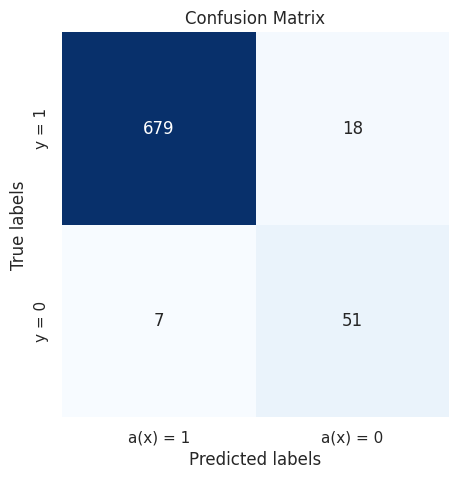

In [ ]:
conf_matrix = error_matrix.to_numpy()
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=error_matrix.columns, yticklabels=error_matrix.index, cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# roc curve
from sklearn.metrics import roc_curve,auc,roc_auc_score
y_pred_prob=classifier.predict_proba(X_test)
fpr4,tpr4,threshold=roc_curve(y_test,y_pred_prob[:,1])
roc_auc4=auc(fpr4,tpr4)
print(roc_auc4)

0.973754514421412


The AUC score of 0.973754514421412 indicates that the random forest classifier has a high performance on the given test set.

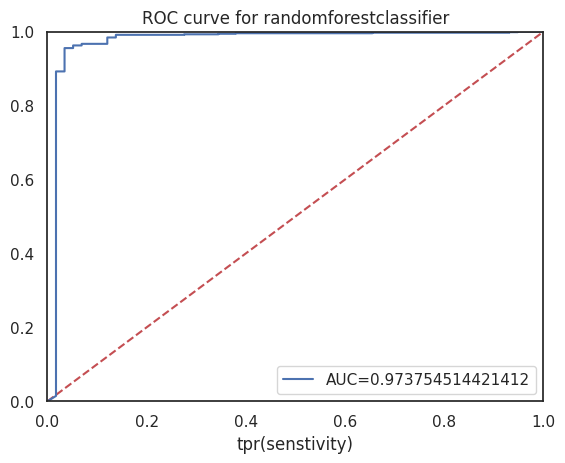

In [ ]:
#roc curve
plt.title("ROC curve for randomforestclassifier")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr4,tpr4,label="AUC="+str(roc_auc4))
plt.legend(loc=4)
plt.show()

This high ROC AUC score signifies that the classifier's predictions are highly reliable and accurate in differentiating between the classes.